Questão 3. Obtenha os seguintes dados no IPEADATA:
• Índice nacional de preços ao consumidor amplo (IPCA) geral: taxa de variação de 1980
a 2022.
• Meio de pagamento ampliado - M2 - fim de período - R$ (milhões).

### Tratamento das bases de dados

In [183]:
# Bibliotecas usadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [184]:
ipca = pd.read_csv(r'C:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 3\Base de dados\IPCA geral.csv')
m2_milhoes = pd.read_csv(r'C:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 3\Base de dados\M2 - milhões.csv')

In [185]:
m2_milhoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                      --------------  -----  
 0   Data                                                                                                                                                                                                                        436 non-null    float64
 1   Meio de pagamento ampliado - M2 - fim de período - R$ - Banco Central do Brasil- Notas Econômico-financeiras para a Imprensa- Política Monetária

In [186]:
m2_milhoes.drop(columns=[col for col in m2_milhoes.columns if "Unnamed" in col], inplace=True, errors='ignore')
ipca.drop(columns=[col for col in ipca.columns if "Unnamed" in col], inplace=True, errors='ignore')

m2_milhoes.columns = ['Data', 'M2']
ipca.columns = ['Data', 'IPCA (% a.m.)']
ipca['IPCA (% a.m.)'] = ipca['IPCA (% a.m.)']/100

In [187]:
ipca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Data           539 non-null    float64
 1   IPCA (% a.m.)  539 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


In [188]:

# Passo 1: Certificar-se de que 'Data' está no formato string
ipca['Data'] = ipca['Data'].astype(str)

# Passo 2: Garantir que o mês sempre tenha dois dígitos
ipca['Ano'] = ipca['Data'].str.split('.').str[0].astype(int)
ipca['Mes'] = ipca['Data'].str.split('.').str[1].apply(lambda x: x.zfill(2)).astype(int)

# Exibindo o resultado
print(ipca[['Data', 'Ano', 'Mes']])

        Data   Ano  Mes
0    1980.01  1980    1
1    1980.02  1980    2
2    1980.03  1980    3
3    1980.04  1980    4
4    1980.05  1980    5
..       ...   ...  ...
534  2024.07  2024    7
535  2024.08  2024    8
536  2024.09  2024    9
537   2024.1  2024    1
538  2024.11  2024   11

[539 rows x 3 columns]


In [191]:
'''def converter_data(value):
    try:
        value_str = str(value).strip()
        ano, mes = value_str.split('.')  # Dividindo o valor em ano e mês
        ano = int(ano)  # Convertendo o ano para inteiro
        mes = mes.zfill(2)  # Garantindo que o mês tenha dois dígitos, ex: '01' para janeiro
        mes = int(mes)  # Convertendo o mês para inteiro
        return pd.Timestamp(year=ano, month=mes, day=1)  # Criando o Timestamp
    except ValueError:
        return pd.NaT 
        
m2_milhoes['Data'] = m2_milhoes['Data'].apply(converter_data)
'''
ipca['Data']

ipca_1980_1994 = ipca[(ipca['Data'] >= '1980.01') & (ipca['Data'] <= '1994.07')]
ipca_1994_em_diante = ipca[ipca['Data'] >= '1994.07']

In [192]:
m2_milhoes.head(18)

,Data,M2
0,1988.07,0.005210
1,1988.08,0.006339
2,1988.09,0.007874
3,1988.10,0.009995
4,1988.11,0.012592
5,1988.12,0.016871
6,1989.01,0.019582
7,1989.02,0.021968
8,1989.03,0.025624
9,1989.04,0.030326



Siga os seguintes passos:
- i. Faça um gráfico para a série de inflação para o período completo e para dois subperíodos: 1980-1994:6 e 1994:7 em diante.
- Para o primeiro subperíodo identifique os diversos planos de estabilização no período.2 A que se deve o sucesso do Plano Real em reduzir a inflação? Qual o papel da responsabilidade fiscal?

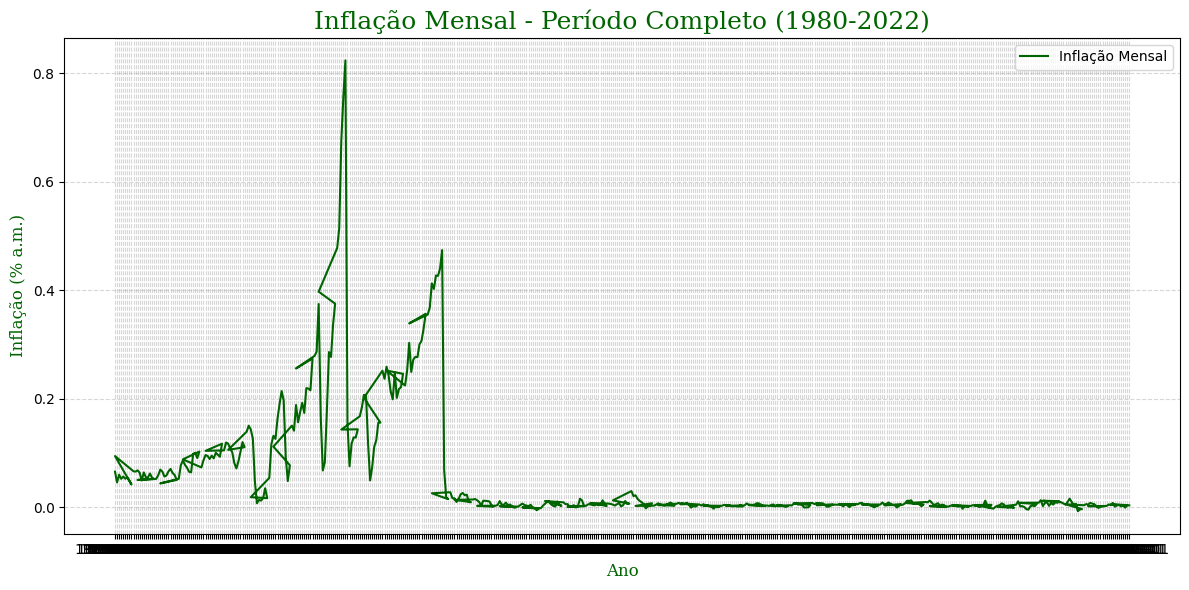

In [193]:
plt.figure(figsize=(12, 6))
plt.plot(ipca['Data'], ipca['IPCA (% a.m.)'], label='Inflação Mensal', color='darkgreen')
plt.title('Inflação Mensal - Período Completo (1980-2022)',  fontdict={'family':'serif','color':'darkgreen','size':18})
plt.xlabel('Ano', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.ylabel('Inflação (% a.m.)', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


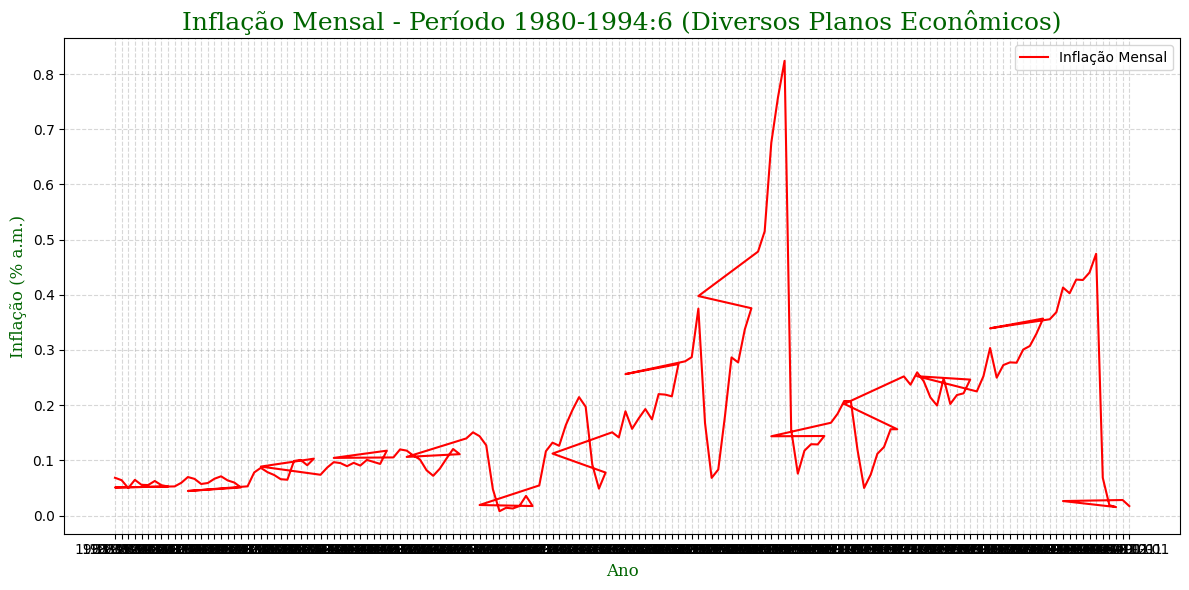

In [194]:
plt.figure(figsize=(12, 6))
plt.plot(ipca_1980_1994['Data'], ipca_1980_1994['IPCA (% a.m.)'], label='Inflação Mensal', color='red')
plt.title('Inflação Mensal - Período 1980-1994:6 (Diversos Planos Econômicos)', fontdict={'family':'serif','color':'darkgreen','size':18})
plt.xlabel('Ano', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.ylabel('Inflação (% a.m.)', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

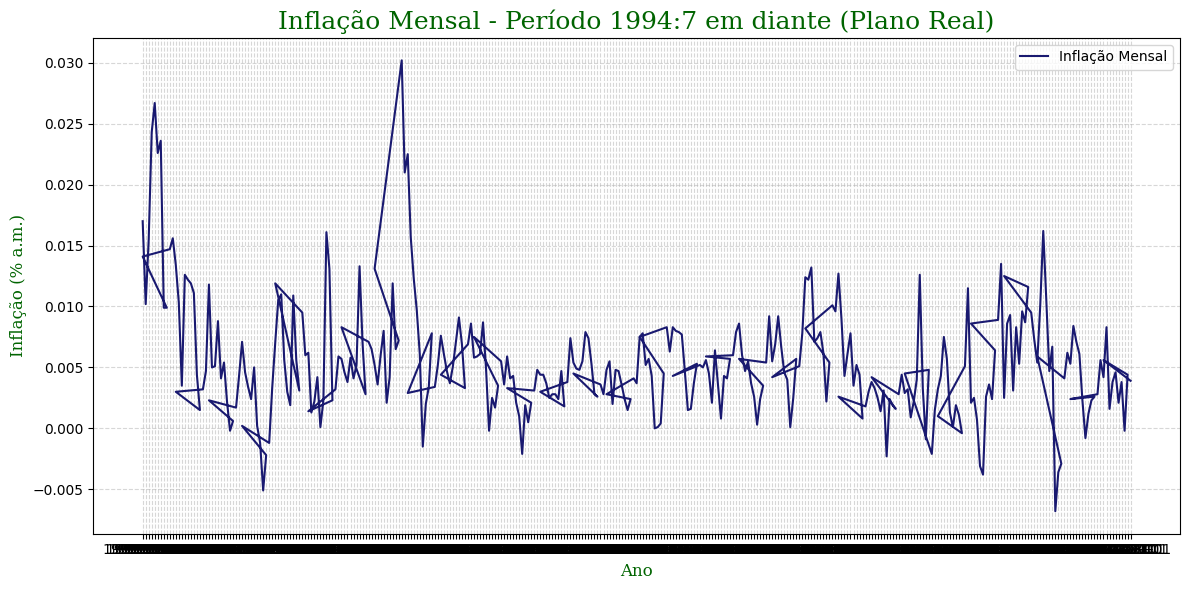

In [195]:
plt.figure(figsize=(12, 6))
plt.plot(ipca_1994_em_diante['Data'], ipca_1994_em_diante['IPCA (% a.m.)'], label='Inflação Mensal', color='midnightblue')
plt.title('Inflação Mensal - Período 1994:7 em diante (Plano Real)', fontdict={'family':'serif','color':'darkgreen','size':18})
plt.xlabel('Ano', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.ylabel('Inflação (% a.m.)', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


ConversionError: Failed to convert value(s) to axis units: Timestamp('1986-03-01 00:00:00')

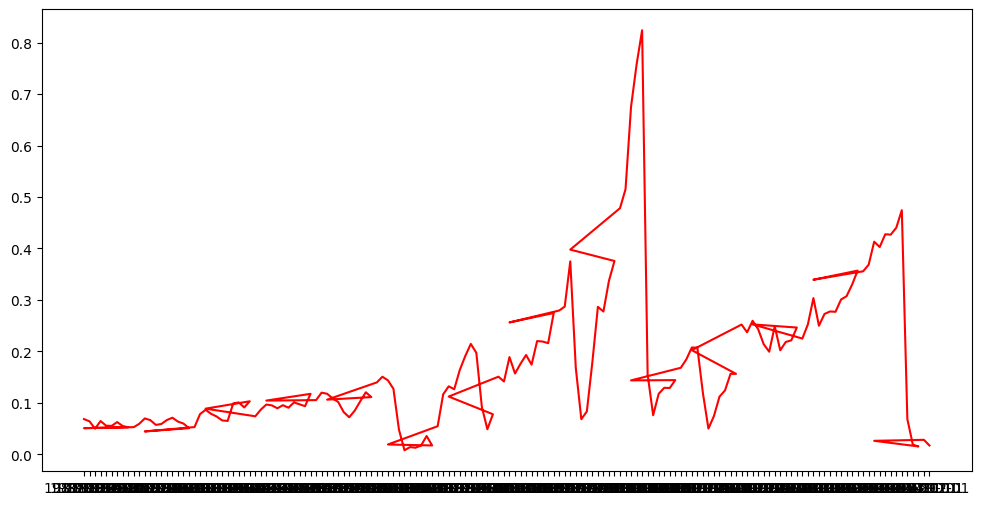

In [196]:
# Datas dos principais planos econômicos
planos = {
    "Plano Cruzado I": "1986-03-01",
    "Plano Cruzado II": "1986-11-01",
    "Plano Bresser": "1987-06-01",
    "Plano Verão": "1989-01-01",
    "Plano Collor I": "1990-03-01",
    "Plano Collor II": "1991-02-01"
}

plt.figure(figsize=(12, 6))
plt.plot(ipca_1980_1994['Data'], ipca_1980_1994['IPCA (% a.m.)'], label='Inflação Mensal', color='red')

for plano, data in planos.items():
    plt.axvline(pd.Timestamp(data), color='black', linestyle='--', alpha=0.7, label=plano)

plt.title('Inflação Mensal - Período 1980-1994:6 (Diversos Planos Econômicos)', fontdict={'family':'serif','color':'darkgreen','size':18})
plt.xlabel('Ano', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.ylabel('Inflação (% a.m.)', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


### Planos de Estabilização
No subperíodo de 1980-1994, o Brasil passou por vários planos econômicos, como:

Plano Cruzado (1986);
Plano Bresser (1987);
Plano Verão (1989);
Plano Collor I e II (1990-1991).
Esses planos falharam principalmente por falta de sustentação fiscal e pela tentativa de controlar a inflação de forma abrupta, como congelamento de preços, sem atacar as causas estruturais.

### O Plano Real (1994) foi bem-sucedido devido a:

Âncora Cambial: O real foi atrelado ao dólar, criando confiança na moeda.
Responsabilidade Fiscal: Medidas como a Lei de Responsabilidade Fiscal (2000) consolidaram o equilíbrio das contas públicas.
Controle Monetário: Foi implementado um regime de metas de inflação, conferindo credibilidade ao Banco Central.
Reformas Estruturais: Medidas para reduzir gastos públicos e melhorar a eficiência econômica.
Papel da responsabilidade fiscal:
A responsabilidade fiscal foi essencial para evitar a emissão de moeda para cobrir déficits, o que era uma das principais causas da hiperinflação. Ao controlar os gastos e implementar políticas fiscais responsáveis, o governo reforçou a estabilidade macroeconômica.

Sucesso do Plano Real: A redução da inflação foi possível devido à introdução da URV (Unidade Real de Valor), que ajudou a estabilizar preços e promover confiança.
Responsabilidade Fiscal: A criação da Lei de Responsabilidade Fiscal (2000) garantiu disciplina nos gastos públicos, promovendo estabilidade macroeconômica no longo prazo.

### ii. Agora calcule a taxa de variação da série de M2 para todo o período disponível. Feito isto, faça um gráfico colocando a taxa de variação (em %) de M2 junto com a taxa de inflação para o período 1988:8-1994:6.

In [197]:
m2_milhoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    436 non-null    float64
 1   M2      436 non-null    float64
dtypes: float64(2)
memory usage: 6.9 KB


In [ ]:
# Taxa de variação de M2
m2_milhoes['Taxa_Variacao_M2'] = m2_milhoes['M2'].pct_change() * 100  

In [ ]:
# Filtrando o período desejado (1988:8-1994:6) para inflação e M2
periodo_inicio = pd.Timestamp('1988-08-01')
periodo_fim = pd.Timestamp('1994-06-01')

ipca_periodo = ipca[(ipca['Data'] >= periodo_inicio) & (ipca['Data'] <= periodo_fim)]
m2_milhoes_periodo = m2_milhoes[(m2_milhoes['Data'] >= periodo_inicio) & (m2_milhoes['Data'] <= periodo_fim)]


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ipca_periodo['Data'], ipca_periodo['IPCA (% a.m.)'], label='Inflação Mensal', color='darkgreen')
plt.plot(m2_milhoes_periodo['Data'], m2_milhoes_periodo['Taxa_Variacao_M2'], label='Taxa de Variação de M2', color='darkorange')

plt.title('Inflação Mensal e Taxa de Variação de M2 (1988-1994)', fontdict={'family': 'serif', 'color': 'darkgreen', 'size': 18})
plt.xlabel('Ano', fontdict={'family': 'serif', 'color': 'darkgreen', 'size': 12})
plt.ylabel('Inflação e Variação (%)', fontdict={'family': 'serif', 'color': 'darkgreen', 'size': 12})
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()